# Corso di Probabilità e Statistica- il metodo di massima verosimiglianza - parte 2

In questo capitolo analizzeremo i dati tramite il metodo 
di massima verosimiglianza.

Consideriamo una distribuzione teorica $p(x|\lambda)$ dipendendente da uno o più parameteri $\lambda$ e un
set di dati sperimentali $(x_1, ... x_N)$. Il metodo
consente di stimare il miglior parametro $\lambda$ che
descrive i dati, massimizzando la funzione

$$ L = \sum_i \log p(x_i|\lambda) $$

### Esempio: distribuzione delle colonie di cellule tumorali

I dati in questione sono colonie di cellule tumorali. In questo esperiento un numero fisso di cellule tumorali sono state messe in un piatto di coltura. Dopo 8 o 10 giorni sono state osservate le cellule. Ogni cellula si è duplicata varie volte dando luogo ad un certo numero di colonie ognuna composta da S cellule. Vogliamo analizzare la distribuzione di S e confrontarlo con un semplice modello teorico (Yule process). Il modello teorico prevede che la distribuzione al tempo $t$ sia data da  

$$P(S|t, \gamma)=e^{-\gamma t} (1-e^{-\gamma t})^{S-1}$$

dove $\gamma$ è il rate di divisione delle cellule.
Per maggiori dettagli vedi l'articolo:
M. M. Baraldi et al J. Stat. Mech. (2013) P02032

https://iopscience.iop.org/article/10.1088/1742-5468/2013/02/P02032/meta?casa_token=qCKRzfJFMGgAAAAA:iolos6z5yRyArZy2TPYZIUcj3HZ17Ul2Eh4N77zOIKUKx10FUZXP_8m7kaHzBKyRWTceCE1jOMyX


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats 
import scipy
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
# parametri
N=2000
rho0=scipy.zeros(N)
rho0[1]=1.
time=scipy.array([0.,8.,10.])
Gamma2_initial=0.55

In [3]:
#leggiamo i dati
day8size=scipy.genfromtxt("../data/Cancer-day8size.dat",dtype='i4')
day10size=scipy.genfromtxt("../data/Cancer-day10size.dat",dtype='i4')    


In [4]:
# inseriamo tutti i dati in un unico vettore 
data=scipy.concatenate((day8size,day10size)) 


In [5]:
# definiamo la p(S|t,gamma) per t=8 (rho8) e t=10 (rho10)
def rhos(Gamma2):
    rho8=scipy.zeros(N)
    for n in range(0,N):
        e8=scipy.exp(-Gamma2*8.)
        rho8[n]=e8*(1-e8)**(n-1)
    rho8[0]=0.
    rho10=scipy.zeros(N)
    for n in range(0,N):
        e10=scipy.exp(-Gamma2*10.)
        rho10[n]=e10*(1-e10)**(n-1)
    rho10[0]=0.

    return rho8,rho10

In [8]:
# funzione che calcola la Likelihood (con il segno meno)
def likelihood(Gamma2):
    rho8,rho10=rhos(Gamma2)
    likelihood=0.
    for i in range(len(day8size)):
        likelihood+=-scipy.log(rho8[day8size[i]])
    for i in  range(len(day10size)):
        likelihood+=-scipy.log(rho10[day10size[i]])
    return likelihood


In [9]:
#troviamo il massimo della Likelihood (calcoliamo il minimo di -L)
bestfit=scipy.optimize.brent(likelihood,brack=(0.4,Gamma2_initial,0.7))
Gamma2_best=bestfit
print(Gamma2_best,likelihood(Gamma2_best))
rho8,rho10=rhos(Gamma2_best)

0.5554592325618334 19693.229458242484


Confrontiamo il fit con i dati considerando la distribuzione cumulata

In [ ]:
rho8cum=scipy.cumsum(rho8)
rho10cum=scipy.cumsum(rho10)

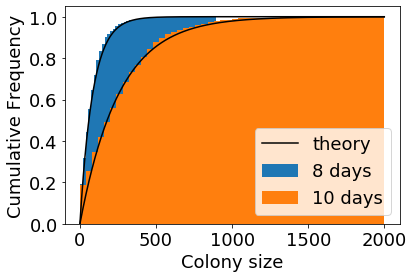

In [10]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})
plt.hist(day8size, cumulative=True, density=True, bins=50,
        label="8 days")
plt.hist(day10size, cumulative=True, density=True, bins=50,
        label="10 days")
#plt.step(y8,idx8, label="8 days", color="yellow") # dati sperimentali 8gg
#plt.step(y10,idx10, label="10 days", color="red") # dati sperimentali 8gg
plt.plot(rho8cum, color="black", label="theory")
plt.plot(rho10cum, color="black")
plt.xlabel('Colony size')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.show()


Facciamo anche il grafico della pdf

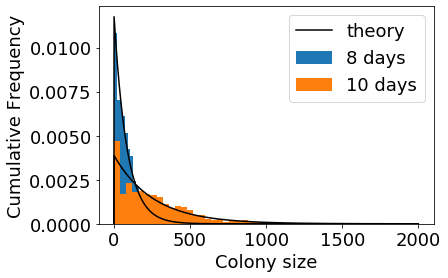

In [16]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})
plt.hist(day8size, density=True, bins=50,
        label="8 days")
plt.hist(day10size, density=True, bins=50,
        label="10 days")
#plt.step(y8,idx8, label="8 days", color="yellow") # dati sperimentali 8gg
#plt.step(y10,idx10, label="10 days", color="red") # dati sperimentali 8gg
plt.plot(rho8, color="black", label="theory")
plt.plot(rho10, color="black")
plt.xlabel('Colony size')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.show()

###Esercizio: Birth and deat 
Ripetere il calcolo precedente nel caso di un modello che consideri anche il rate di morte $\beta$  per le cellule. In questo modello (noto come birth and death process), la probabilità di trovare al tempo $t$ una colonia di dimensione $S$ è data da 

$$P(S|t, \gamma)=\langle s(t) \rangle 
\left( \frac{\gamma-\beta}{\gamma\langle 
s(t) \rangle -\beta}\right)^2\left( 1- \frac{\gamma-\beta}{\gamma\langle 
s(t) \rangle -\beta}\right)^{S-1}$$



dove

$$\langle s(t) \rangle= e^{(\gamma-\beta)t}$$

Stimare $\gamma$ e $\beta$ e confrontare il risultato con i dati sperimentali facendo un grafico delle distribuzioni cumulate.

**Suggerimento:** per minimizzare una funzione a molti parametri potete usare scipy.optimize.fmin invece di scipy.optimize.brent
vedi:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html
        